### 네이버 영화 <삼진그룹 영어토익반> 별점 페이지 접근 해보기

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [3]:
start_page = '&page=8'

In [4]:
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [5]:
reply_list = soup.select_one('.score_result').find_all('li')
len(reply_list)

10

In [6]:
star_score = int(reply_list[0].select_one('.star_score').get_text().strip())
star_score

10

In [7]:
len(reply_list[3].find_all('span'))

10

In [205]:
datetime = datetime.strptime(reply_list[0].find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
time = datetime.time()
date = datetime.date()
str(time)

'11:09:00'

In [9]:
sym = int(reply_list[0].select_one('.btn_area').find_all('strong')[0].get_text())
nonsym = int(reply_list[0].select_one('.btn_area').find_all('strong')[1].get_text())
sym,nonsym


(38, 15)

### 페이지 1개 데이터 데이터프레임만들기

In [10]:
star_score_list = []; contents_list = []; time_list = []
sym_list = []; nonsym_list = []
for reply in reply_list:
    star_score = int(reply.select_one('.star_score').get_text().strip())
    contents = reply.find_all('span')[3].get_text().strip()
    time = reply.find('dt').get_text().split('\n')[-2].split(' ')[0]
    sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
    nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
    star_score_list.append(star_score)
    contents_list.append(contents)
    time_list.append(time)
    sym_list.append(sym)
    nonsym_list.append(nonsym)

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df

,별점,내용,작성일,공감,비공감
0,10,3인방의 연기앙상블이 너무 좋다,2020.10.24,38,15
1,1,스탠(tyjo****),2020.10.25,43,20
2,10,스느드브빠(sang****),2020.10.21,44,21
3,10,세 배우를 비롯한 조연들의 탄탄한 연기+쫀쫀한 스토리+감동과 재미까지 완벽한 영화였...,2020.10.22,47,24
4,10,레트로 감성 가득한 영화였네요 좋았습니다,2020.10.21,47,24
5,7,주연 셋 조합 최고..고아성 최고..,2020.10.29,33,12
6,10,벚꽃의계절(twic****),2020.10.21,45,25
7,10,사람은 무엇으로 사는지 다시 생각하게 하는 영화,2020.10.26,35,16
8,4,사실 그냥...뭐 그냥 저냥 느낌이에요 킬링타임으론 괜츈,2020.10.31,36,17
9,10,오랜만에 만족한 한국영화,2020.10.22,36,17


In [13]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
total

6077

In [14]:
end_page = (total // 10) + 1
end_page

608

### 전체 페이지 크롤링 후 데이터 프레임만들기

In [107]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [108]:
start_page = '&page=1'
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [109]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
end_page = (total // 10) + 1  # 한 페이지에 댓글 10개씩

In [110]:
from tqdm import tqdm_notebook

In [125]:
from datetime import datetime

In [170]:
star_score_list = []; contents_list = []; date_list = [];time_list = []
sym_list = []; nonsym_list = []
for i in tqdm_notebook(range(end_page)):
    page = f'&page={i + 1}'
    html = urlopen(url_base + iframe + page)
    soup = BeautifulSoup(html, 'html.parser')
    reply_list = soup.select_one('.score_result').find_all('li')
    for reply in reply_list:
        star_score = int(reply.select_one('.star_score').get_text().strip())
        datetime = datetime.strptime(reply.find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
        date = datetime.date()
        time = datetime.time()
        sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
        nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
        spans = reply.find_all('span')
        if len(spans) == 9:
            contents = reply.find_all('span')[3].get_text().strip()
        elif len(spans) == 8:
            contents = reply.find_all('span')[2].get_text().strip()
        else: 
            contents = ''
        star_score_list.append(star_score)
        contents_list.append(contents)
        date_list.append(date)
        time_list.append(time)
        sym_list.append(sym)
        nonsym_list.append(nonsym)

In [171]:
df2 = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : date_list,
    '작성시간' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df2

,별점,내용,작성일,작성시간,공감,비공감
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1525,282
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1349,237
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1202,231
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1044,210
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,932,198
...,...,...,...,...,...,...
6073,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24
6074,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36
6075,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37
6076,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41


In [172]:
df2.to_csv('Movie_reply.csv', sep=',',encoding='utf8')

In [173]:
df2.describe()

,별점,공감,비공감
count,6078.000000,6078.00000,6078.000000
mean,8.464627,4.41461,2.420698
std,2.880766,41.90499,10.316046
min,1.000000,0.00000,0.000000
25%,8.000000,0.00000,0.000000
50%,10.000000,1.00000,1.000000
75%,10.000000,2.00000,2.000000
max,10.000000,1525.00000,282.000000


In [174]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

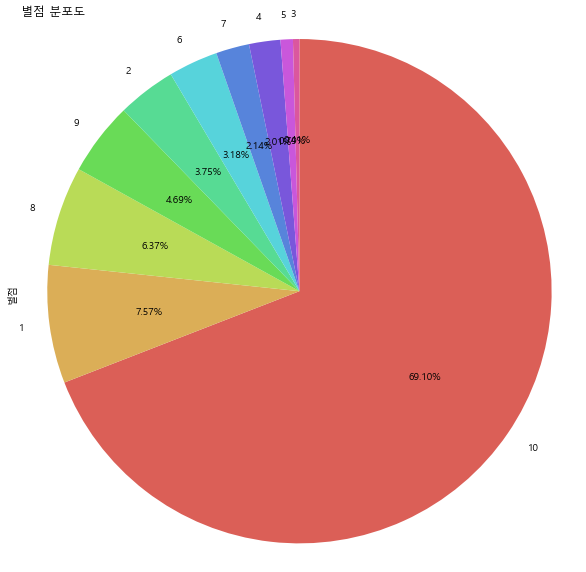

In [247]:
fig = plt.figure(figsize=(10,10)) 
labels = df2['별점'].value_counts().index.tolist()
labels.sort()
colors = sns.color_palette('hls',len(labels))
df2['별점'].value_counts().plot.pie(startangle=90,
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors )
plt.axis('equal')
plt.title('별점 분포도',loc = 'left')
plt.show()

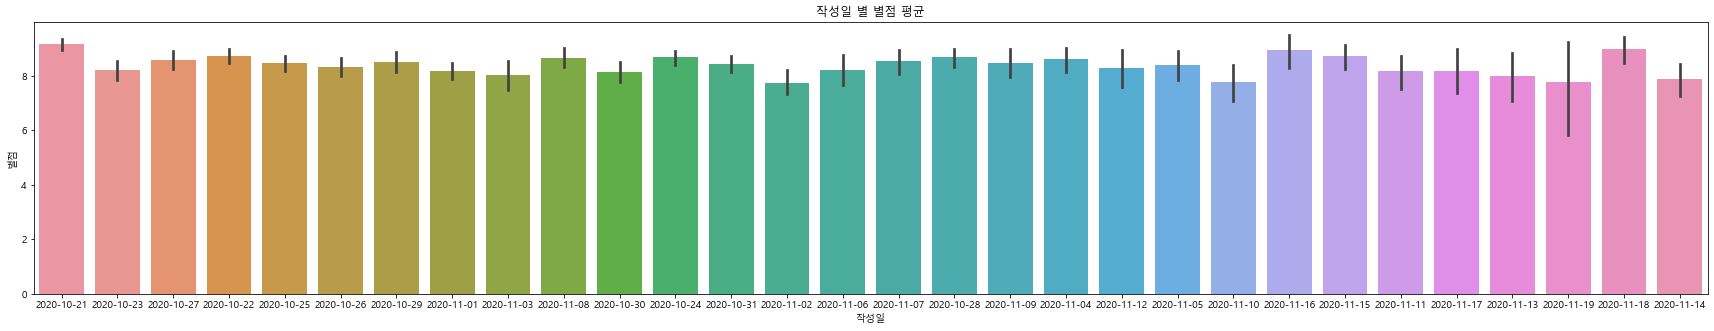

In [245]:
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x='작성일',y='별점',data=df2)
plt.title('작성일 별 별점 평균')
plt.show()

In [190]:
# 작성일에서 요일 가져오기
weekday = []
for i in df2['작성일'].tolist():
    weekday.append(i.weekday())

In [191]:
df2['작성요일'] = weekday
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1525,282,2
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1349,237,2
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1202,231,2
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1044,210,2
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,932,198,2
...,...,...,...,...,...,...,...
6073,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2
6074,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4
6075,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0
6076,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5


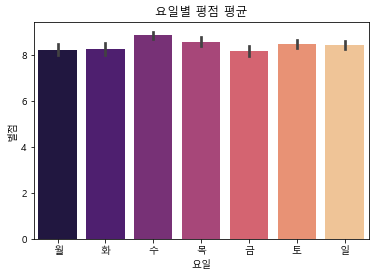

In [248]:
sns.barplot(x='작성요일',y ='별점',data = df2,palette = 'magma')
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.xlabel('요일')
plt.title('요일별 평점 평균')
plt.show()

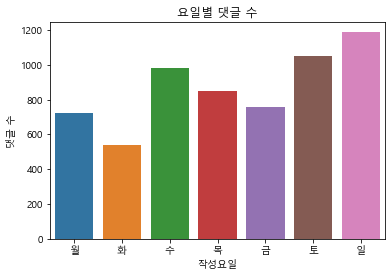

In [234]:
sns.countplot(x='작성요일',data=df2)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.ylabel('댓글 수')
plt.title('요일별 댓글 수')
plt.show()

In [220]:
# 작성시간 시간대별로 나누기
df2['작성시간'] = df2['작성시간'].astype(str)
tmp = []
for i in df2['작성시간'].tolist():
    tmp.append(i.replace(':',''))
df2['tmp'] = tmp
df2['tmp'].astype(int)
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일,tmp
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1525,282,2,135300
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1349,237,2,154300
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1202,231,2,153600
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1044,210,2,154400
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,932,198,2,135200
...,...,...,...,...,...,...,...,...
6073,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2,111300
6074,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4,021400
6075,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0,064600
6076,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5,085400


In [222]:
bins = [000000,60000,100000,180000,210000,240000]
labels = ["새벽", "아침", "낮", "저녁", "밤"]
cats = pd.cut(tmp, bins, labels = labels)
df2['time_div'] = cats
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일,tmp,time_div
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1525,282,2,135300,새벽
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1349,237,2,154300,낮
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1202,231,2,153600,낮
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1044,210,2,154400,낮
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,932,198,2,135200,낮
...,...,...,...,...,...,...,...,...,...
6073,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2,111300,낮
6074,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4,021400,새벽
6075,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0,064600,새벽
6076,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5,085400,새벽


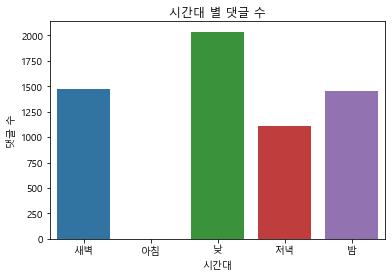

In [237]:
sns.countplot(x='time_div',data = df2)
plt.ylabel('댓글 수')
plt.xlabel('시간대')
plt.title('시간대 별 댓글 수')
plt.show()

### 네이버 영화 <도굴> 별점 페이지 접근 해보기

In [254]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=193194'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [255]:
start_page = '&page=1'
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [256]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
end_page = (total // 10) + 1

In [257]:
star_score_list = []; contents_list = []; date_list = [];time_list = []
sym_list = []; nonsym_list = []
for i in tqdm_notebook(range(end_page)):
    page = f'&page={i + 1}'
    html = urlopen(url_base + iframe + page)
    soup = BeautifulSoup(html, 'html.parser')
    reply_list = soup.select_one('.score_result').find_all('li')
    for reply in reply_list:
        star_score = int(reply.select_one('.star_score').get_text().strip())
        datetime = datetime.strptime(reply.find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
        date = datetime.date()
        time = datetime.time()
        sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
        nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
        spans = reply.find_all('span')
        if len(spans) == 9:
            contents = reply.find_all('span')[3].get_text().strip()
        elif len(spans) == 8:
            contents = reply.find_all('span')[2].get_text().strip()
        else: 
            contents = ''
        star_score_list.append(star_score)
        contents_list.append(contents)
        date_list.append(date)
        time_list.append(time)
        sym_list.append(sym)
        nonsym_list.append(nonsym)

In [258]:
df3 = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : date_list,
    '작성시간' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df3

,별점,내용,작성일,작성시간,공감,비공감
0,7,킬링타임용 영화 내용은 좀 뻔함 여운 없음,2020-11-05,13:23:00,427,150
1,10,이제훈 진짜 멋있당 ㅋㅋㅋ 웃을때마다 심쿵 ㅜㅜ,2020-11-04,15:26:00,413,218
2,4,내 시간을 도굴당해버렸다..,2020-11-08,15:41:00,305,120
3,10,내용은 평이했으나 신혜선이 예쁘다. 특히 눈매가 참 예쁘다. 사랑스럽다.,2020-11-06,14:30:00,291,127
4,10,간만에 진짜 재밌게봄 ㅋㅋㅋㅋ 이제훈 귀ㅇㅕ워 ㅠㅠㅠㅠ,2020-11-04,12:40:00,343,215
...,...,...,...,...,...,...
2311,5,재미있으면 추천 vs 재미없으면 비추천눌러주세요,2020-11-04,09:24:00,23,33
2312,10,지루할 틈 없이 보고 왔네요~ 추천합니다^^,2020-11-05,00:19:00,24,34
2313,6,나름대로 잘봤습니다 신선한소재라 재밌었지만막판에 너무 코미디적 요소가 많아 ㅋ,2020-11-05,13:11:00,15,26
2314,10,"깔깔 웃으면서 보게 되는 영화, 다들 연기 너무 잘함ㅋ",2020-11-04,19:50:00,23,34


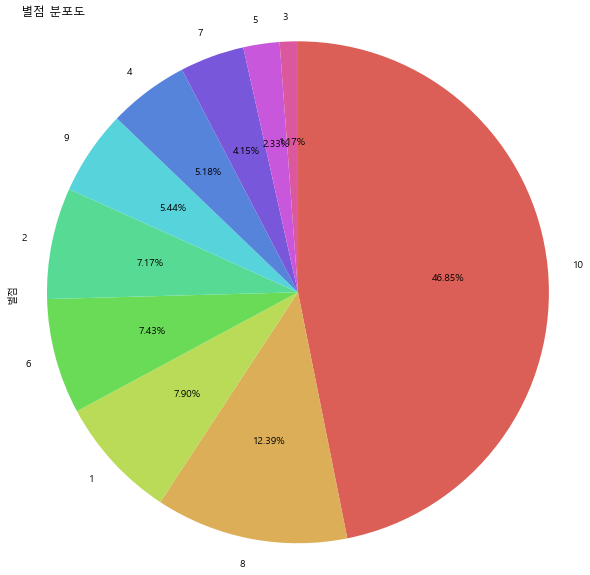

In [259]:
fig = plt.figure(figsize=(10,10)) 
labels = df3['별점'].value_counts().index.tolist()
labels.sort()
colors = sns.color_palette('hls',len(labels))
df3['별점'].value_counts().plot.pie(startangle=90,
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors )
plt.axis('equal')
plt.title('별점 분포도',loc = 'left')
plt.show()

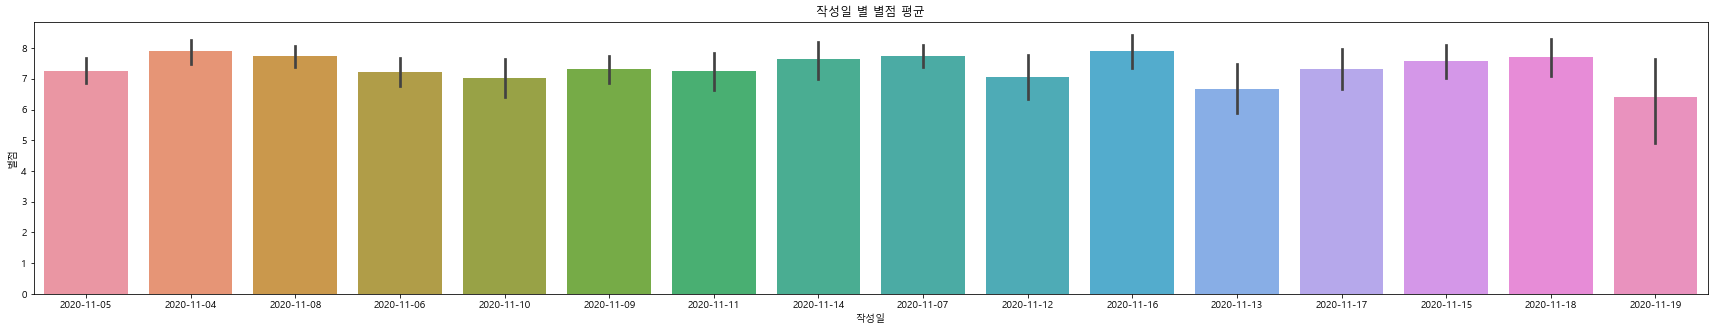

In [260]:
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x='작성일',y='별점',data=df3)
plt.title('작성일 별 별점 평균')
plt.show()

In [261]:
weekday = []
for i in df3['작성일'].tolist():
    weekday.append(i.weekday())

In [262]:
df3['작성요일'] = weekday

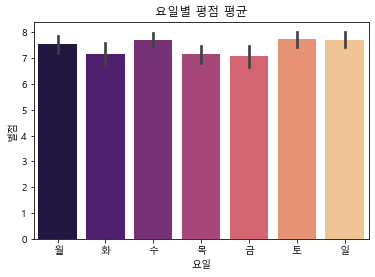

In [263]:
sns.barplot(x='작성요일',y ='별점',data = df3,palette = 'magma')
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.xlabel('요일')
plt.title('요일별 평점 평균')
plt.show()

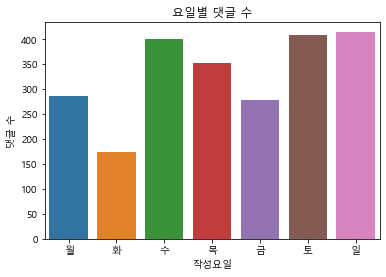

In [264]:
sns.countplot(x='작성요일',data=df3)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.ylabel('댓글 수')
plt.title('요일별 댓글 수')
plt.show()

In [266]:
df3['작성시간'] = df3['작성시간'].astype(str)
tmp = []
for i in df3['작성시간'].tolist():
    tmp.append(i.replace(':',''))
df3['tmp'] = tmp
df3['tmp'].astype(int)

0       132300
1       152600
2       154100
3       143000
4       124000
         ...  
2311     92400
2312      1900
2313    131100
2314    195000
2315    121000
Name: tmp, Length: 2316, dtype: int32

In [267]:
bins = [000000,60000,100000,180000,210000,240000]
labels = ["새벽", "아침", "낮", "저녁", "밤"]
cats = pd.cut(tmp, bins, labels = labels)
df3['time_div'] = cats

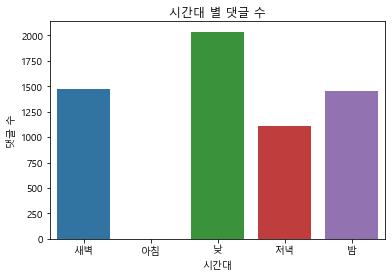

In [268]:
sns.countplot(x='time_div',data = df2)
plt.ylabel('댓글 수')
plt.xlabel('시간대')
plt.title('시간대 별 댓글 수')
plt.show()